<a href="https://colab.research.google.com/github/mateo20-bot/Proyectos_/blob/Proyecto-IV/proyecto9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/labeconometria/proyectos/main/economicas.csv')

In [ ]:
df

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,EK202120232172,2001,ANÁLISIS ECONÓMICO,151,2,S,CC,COLOMBIA,M,18/03/1996,...,3.0,93,87,196,93,98,75.589753,4.0,4,PUBLICAR
3851,EK202120320571,2001,ANÁLISIS ECONÓMICO,162,3,S,CC,COLOMBIA,F,26/07/2000,...,3.0,80,69,192,90,97,75.346915,4.0,4,PUBLICAR
3852,EK202120313923,2001,ANÁLISIS ECONÓMICO,0,1,S,CC,COLOMBIA,F,30/01/1989,...,3.0,71,57,158,47,70,48.890151,2.0,2,PUBLICAR
3853,EK202120281981,2001,ANÁLISIS ECONÓMICO,110,1,S,CC,COLOMBIA,F,23/04/1998,...,1.0,14,9,117,6,15,43.091355,1.0,2,PUBLICAR


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [ ]:
df_fil = df.filter(['RESULT_PUNTAJE','PERIODO','ESTU_COD_RESIDE_DEPTO','ESTU_GENERO'])

In [ ]:
df_fil

,RESULT_PUNTAJE,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_GENERO
0,128,20212,25,M
1,209,20212,11,M
2,106,20212,8,M
3,89,20212,11,F
4,122,20212,11,M
...,...,...,...,...
3850,151,20212,76,M
3851,162,20212,11,F
3852,0,20212,11,F
3853,110,20212,8,F


In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RESULT_PUNTAJE         3855 non-null   int64 
 1   PERIODO                3855 non-null   int64 
 2   ESTU_COD_RESIDE_DEPTO  3855 non-null   int64 
 3   ESTU_GENERO            3855 non-null   object
dtypes: int64(3), object(1)
memory usage: 120.6+ KB


In [ ]:
int_cols = df_fil.select_dtypes('int64').columns
int_cols

Index(['RESULT_PUNTAJE', 'PERIODO', 'ESTU_COD_RESIDE_DEPTO'], dtype='object')

In [ ]:
for col in int_cols:
  df_fil[col] = df_fil[col].astype('int16')

In [ ]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   RESULT_PUNTAJE         3855 non-null   int16 
 1   PERIODO                3855 non-null   int16 
 2   ESTU_COD_RESIDE_DEPTO  3855 non-null   int16 
 3   ESTU_GENERO            3855 non-null   object
dtypes: int16(3), object(1)
memory usage: 52.8+ KB


In [ ]:
X=df_fil

In [ ]:
X = X.to_numpy()
l = []
for i in X.T:
  u = i.mean()
  s = i.std()
  l.append(scal)

x_scal = np.array(l).T

TypeError: ignored

In [ ]:
X_digits_tsne=X
y_digits=10

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


ZeroDivisionError: ignored

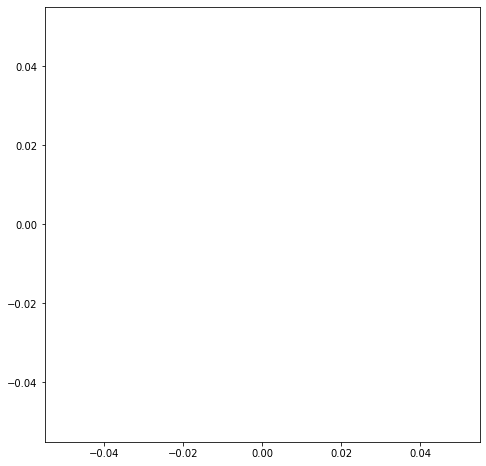

In [ ]:
import matplotlib.patheffects as PathEffects 

def plot_projection(x, colors):

  f = plt.figure(figsize=(8, 8)) 
  ax = plt.subplot(aspect='equal') 
  for i in range(10):
      plt.scatter(x[colors == i, 0],
                  x[colors == i, 1])
  for i in range(10):
    xtext, ytext = np.median(x[colors == i, :], axis=10) 
    txt = ax.text(xtext, ytext, str(i), fontsize=24) 
    txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
plot_projection(X_digits_tsne, y_digits)
plt.show()

In [ ]:
pred = make_pipeline(StandardScaler(),
              PCA(n_components=2))
s_pca.fit(X)
pd.DataFrame(s_pca.fit_transform(X))

,0,1
0,-0.088821,0.077746
1,-1.652568,1.680973
2,0.365232,-0.328367
3,0.693339,-0.664934
4,0.048215,-0.019810
...,...,...
3850,-0.610363,0.455468
3851,-0.733754,0.762159
3852,2.433220,-2.404815
3853,0.287035,-0.250170
